<a href="https://colab.research.google.com/github/rashmi-22-stack/correlation-GDP-Gini-coefficient/blob/main/GDP_vs_Inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step. 1

In [122]:
# first of all preparing github raw link
github_link_gdp= "https://github.com/rashmi-22-stack/correlation-GDP-Gini-coefficient/raw/main/gdp-per-capita-penn-world-table.csv"
github_link_inequality="https://github.com/rashmi-22-stack/correlation-GDP-Gini-coefficient/raw/main/inequality.csv"


In [123]:
# import required packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
# Read files form github url link
df_GDP= pd.read_csv(github_link_gdp)
df_inequality= pd.read_csv(github_link_inequality)

In [125]:
# looking at first data
df_GDP.head()

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1970,3114.0884
1,Albania,ALB,1971,3159.8088
2,Albania,ALB,1972,3214.6665
3,Albania,ALB,1973,3267.8481
4,Albania,ALB,1974,3330.0708


In [126]:
df_GDP.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita (output, multiple price benchmarks)'],
      dtype='object')

In [127]:
# rename the col. name "Entity"
df_GDP.rename(columns={'Entity':'Country'}, inplace =True)
df_GDP  # now both df has same column name for merging

,Country,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1970,3114.0884
1,Albania,ALB,1971,3159.8088
2,Albania,ALB,1972,3214.6665
3,Albania,ALB,1973,3267.8481
4,Albania,ALB,1974,3330.0708
...,...,...,...,...
10394,Zimbabwe,ZWE,2015,2880.9058
10395,Zimbabwe,ZWE,2016,2919.6170
10396,Zimbabwe,ZWE,2017,3112.8750
10397,Zimbabwe,ZWE,2018,3007.2370


In [128]:
#  understanding little about data type etc.
df_GDP.describe
df_GDP.dtypes # important to know first the type of time column specially

Country                                                object
Code                                                   object
Year                                                    int64
GDP per capita (output, multiple price benchmarks)    float64
dtype: object

In [129]:
# let's change the Year column in Datetime type
df_GDP['Year']= pd.to_datetime(df_GDP['Year'], format='%Y')
df_GDP.dtypes # just checking again for be sure

# i want to check the frequency of datetime value, in case if i have to merge the two datas with year column
frequency= df_GDP['Year'].value_counts(normalize=True)
print(frequency)

# set the datetime column into index
df_GDP.set_index('Year', inplace=True)
df_GDP

2005-01-01    0.017598
2013-01-01    0.017598
2006-01-01    0.017598
2007-01-01    0.017598
2008-01-01    0.017598
                ...   
1954-01-01    0.006443
1953-01-01    0.006058
1952-01-01    0.005866
1951-01-01    0.005770
1950-01-01    0.005289
Name: Year, Length: 70, dtype: float64


,Country,Code,"GDP per capita (output, multiple price benchmarks)"
Year,,,
1970-01-01,Albania,ALB,3114.0884
1971-01-01,Albania,ALB,3159.8088
1972-01-01,Albania,ALB,3214.6665
1973-01-01,Albania,ALB,3267.8481
1974-01-01,Albania,ALB,3330.0708
...,...,...,...
2015-01-01,Zimbabwe,ZWE,2880.9058
2016-01-01,Zimbabwe,ZWE,2919.6170
2017-01-01,Zimbabwe,ZWE,3112.8750


*It seems that dataset is a Pandas Series with datetime values as the index and their corresponding frequencies as float values. The length of 70 suggests that there are 70 unique datetime values in 'Year' column. *

In [130]:
# doing same with other dataframe :
df_inequality

,Country,Year,Gini coefficient (before tax) (World Inequality Database),Income share of the richest 10% (before tax) (World Inequality Database),Income share of the richest 1% (before tax) (World Inequality Database),Income share of the richest 0.1% (before tax) (World Inequality Database),Income share of the poorest 50% (before tax) (World Inequality Database),Palma ratio (before tax) (World Inequality Database),p0p100_gini_posttax_nat,s80_s20_ratio_pretax,...,p60p70_thr_posttax_nat,p70p80_thr_posttax_nat,p80p90_thr_posttax_nat,p90p100_thr_posttax_nat,p99_999p100_thr_posttax_nat,p99_99p100_thr_posttax_nat,p99_9p100_thr_posttax_nat,p99p100_thr_posttax_nat,median_pretax,median_posttax_nat
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9922,Zimbabwe,2017,0.635799,52.569996,17.48,5.15,11.25,7.281163,NaN,41.567900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2416.1062,NaN
9923,Zimbabwe,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9924,Zimbabwe,2019,0.685154,58.950000,21.08,5.89,9.23,10.094178,NaN,56.850395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.0613,NaN
9925,Zimbabwe,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_inequality.columns

In [131]:
#  keep only four columns here for further analysis
columns_to_keep=['Year', 'Country',
       'Gini coefficient (before tax) (World Inequality Database)']
## Using .loc to select the desired columns
df_Gini = df_inequality.loc[:, columns_to_keep]
df_Gini

,Year,Country,Gini coefficient (before tax) (World Inequality Database)
0,1980,Afghanistan,NaN
1,1981,Afghanistan,NaN
2,1982,Afghanistan,NaN
3,1983,Afghanistan,NaN
4,1984,Afghanistan,NaN
...,...,...,...
9922,2017,Zimbabwe,0.635799
9923,2018,Zimbabwe,NaN
9924,2019,Zimbabwe,0.685154
9925,2020,Zimbabwe,NaN


In [132]:
# same as above #check first for data types for every column
df_Gini.dtypes

# convert 'Year'to datetime
df_Gini['Year']= pd.to_datetime(df_Gini['Year'], format='%Y')
df_Gini

,Year,Country,Gini coefficient (before tax) (World Inequality Database)
0,1980-01-01,Afghanistan,NaN
1,1981-01-01,Afghanistan,NaN
2,1982-01-01,Afghanistan,NaN
3,1983-01-01,Afghanistan,NaN
4,1984-01-01,Afghanistan,NaN
...,...,...,...
9922,2017-01-01,Zimbabwe,0.635799
9923,2018-01-01,Zimbabwe,NaN
9924,2019-01-01,Zimbabwe,0.685154
9925,2020-01-01,Zimbabwe,NaN


Step . 2

In [133]:
# check missing values
missing_values_gdp = df_GDP.isnull().sum()
missing_values_gini = df_Gini.isnull().sum()

print("Missing Values in GDP Data:")
print(missing_values_gdp)

print("\nMissing Values in Inequality Data:")
print(missing_values_gini)


Missing Values in GDP Data:
Country                                               0
Code                                                  0
GDP per capita (output, multiple price benchmarks)    0
dtype: int64

Missing Values in Inequality Data:
Year                                                            0
Country                                                         0
Gini coefficient (before tax) (World Inequality Database)    5606
dtype: int64


In [134]:
# handle NaN values
# Impute NaN values (eg. with mean )

df_GDP['GDP per capita (output, multiple price benchmarks)'].fillna(df_GDP['GDP per capita (output, multiple price benchmarks)'].mean(), inplace=True)
df_Gini['Gini coefficient (before tax) (World Inequality Database)'].fillna(df_inequality['Gini coefficient (before tax) (World Inequality Database)'].mean(), inplace=True)

# Option 2: Remove rows with NaN values
# df_GDP.dropna(subset=['GDP per capita (output, multiple price benchmarks)'], inplace=True)
# df_inequality.dropna(subset=['Gini coefficient (before tax) (World Inequality Database)'], inplace=True)


In [135]:
# Convert GDP column to numeric
df_GDP['GDP per capita (output, multiple price benchmarks)'] = pd.to_numeric(df_GDP['GDP per capita (output, multiple price benchmarks)'], errors='coerce')

# Convert Gini coefficient column to numeric
df_Gini['Gini coefficient (before tax) (World Inequality Database)'] = pd.to_numeric(df_inequality['Gini coefficient (before tax) (World Inequality Database)'], errors='coerce')

Step . 3

In [136]:
# As we have now a common 'Country' column in both dataframes merging them before processing further
merged_df = df_GDP.merge(df_Gini, on=('Country', 'Year'),  how='inner')
merged_df


,Country,Year,Code,"GDP per capita (output, multiple price benchmarks)",Gini coefficient (before tax) (World Inequality Database)
0,Albania,1980-01-01,ALB,3714.5410,NaN
1,Albania,1981-01-01,ALB,3786.3180,NaN
2,Albania,1982-01-01,ALB,3724.3580,NaN
3,Albania,1983-01-01,ALB,3775.8096,NaN
4,Albania,1984-01-01,ALB,3738.4922,NaN
...,...,...,...,...,...
6695,Zimbabwe,2015-01-01,ZWE,2880.9058,NaN
6696,Zimbabwe,2016-01-01,ZWE,2919.6170,NaN
6697,Zimbabwe,2017-01-01,ZWE,3112.8750,0.635799
6698,Zimbabwe,2018-01-01,ZWE,3007.2370,NaN


In [ ]:
# merged_df.describe
#merged_df.columns

In [137]:
# Convert 'Year' column to datetime
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')

# Set 'Year' as the index
merged_df.set_index('Year', inplace=True)

# Resample to annual frequency ('A') and apply aggregation functions (e.g., mean , sum, first or last)
resampled_merged_df = merged_df.resample('A').first()

# Reset the index
resampled_merged_df.reset_index(inplace=True)

resampled_merged_df

,Year,Country,Code,"GDP per capita (output, multiple price benchmarks)",Gini coefficient (before tax) (World Inequality Database)
0,1950-12-31,Argentina,ARG,2931.7388,0.488155
1,1951-12-31,Australia,AUS,12852.6900,0.433112
2,1952-12-31,Australia,AUS,12414.0020,0.429347
3,1953-12-31,Australia,AUS,13721.2020,0.427664
4,1954-12-31,Australia,AUS,14403.2380,0.424836
...,...,...,...,...,...
65,2015-12-31,Albania,ALB,11644.7920,0.493067
66,2016-12-31,Albania,ALB,11674.5890,0.505050
67,2017-12-31,Albania,ALB,12126.5230,0.497760
68,2018-12-31,Albania,ALB,12267.3120,0.491266


* *** While i was using **.mean()** method of aggregation , 'Country' column was disappeared. Because *Country* column has non_numeric values and Pandas automatically removes non-numeric columns because it doesn't make sense to take the mean of string (non-numeric) values. so, to Preserve the *Country* column i used **.first()**  one of the aggeregation functions*

In [ ]:
resampled_merged_df.columns

In [139]:
# shorten or change the  columns name
resampled_merged_df.rename(columns={'GDP per capita (output, multiple price benchmarks)': 'GDP', 'Gini coefficient (before tax) (World Inequality Database)':'Gini Coefficient'}, inplace=True)
resampled_merged_df

,Year,Country,Code,GDP,Gini Coefficient
0,1950-12-31,Argentina,ARG,2931.7388,0.488155
1,1951-12-31,Australia,AUS,12852.6900,0.433112
2,1952-12-31,Australia,AUS,12414.0020,0.429347
3,1953-12-31,Australia,AUS,13721.2020,0.427664
4,1954-12-31,Australia,AUS,14403.2380,0.424836
...,...,...,...,...,...
65,2015-12-31,Albania,ALB,11644.7920,0.493067
66,2016-12-31,Albania,ALB,11674.5890,0.505050
67,2017-12-31,Albania,ALB,12126.5230,0.497760
68,2018-12-31,Albania,ALB,12267.3120,0.491266


In [ ]:
resampled_merged_df.columns

Step. 4

In [141]:
# calculate the "correlation coefficient" of the GDP and the Gini coefficient for world database.
correlation_coefficient=resampled_merged_df['GDP'].corr(resampled_merged_df['Gini Coefficient'])

print("Correlation coefficient of the GDP and the Gini coefficient =")
print(correlation_coefficient)

Correlation coefficient of the GDP and the Gini coefficient =
-0.5078913008388448


** ***Result*** :   In this case, **-0.5078 suggests a moderate negative correlation**, meaning there is some degree of relationship between GDP and the Gini coefficient, but it's not extremely strong.

In practical terms, this correlation suggests that there may be a tendency for countries with higher Gross Domestic Product to have lower Income Inequality (lower Gini coefficient) and vice versa. **

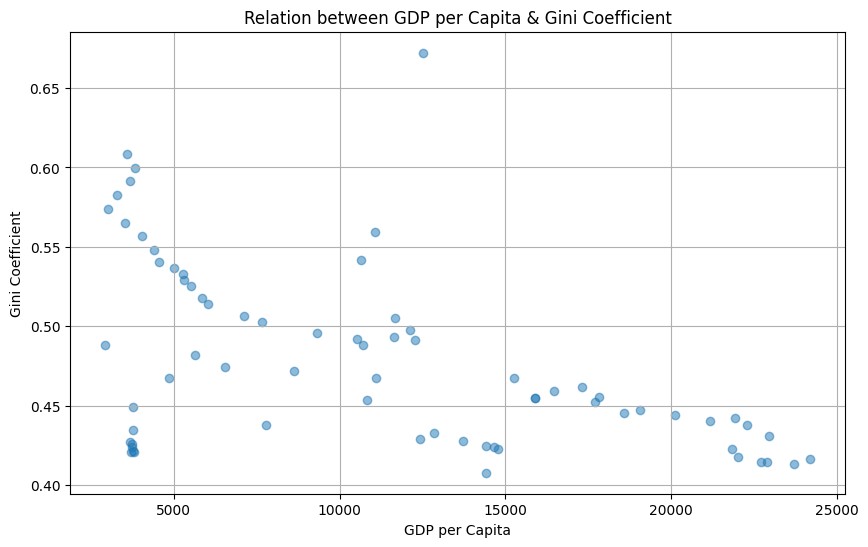

Correlation between GDP and Gini Coefficient: Country
Albania      0.095131
Algeria      1.000000
Argentina         NaN
Australia   -0.263686
Name: Gini Coefficient, dtype: float64


In [142]:
# * world graph for correlation between GDP & income inequality

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(
    resampled_merged_df['GDP'],
    resampled_merged_df['Gini Coefficient'],
    alpha=0.5,
)
plt.title('Relation between GDP per Capita & Gini Coefficient')
plt.xlabel('GDP per Capita')
plt.ylabel('Gini Coefficient')

plt.grid(True)
plt.show()

# Print the correlation coefficient
print(f'Correlation between GDP and Gini Coefficient: {corr_coeff}')

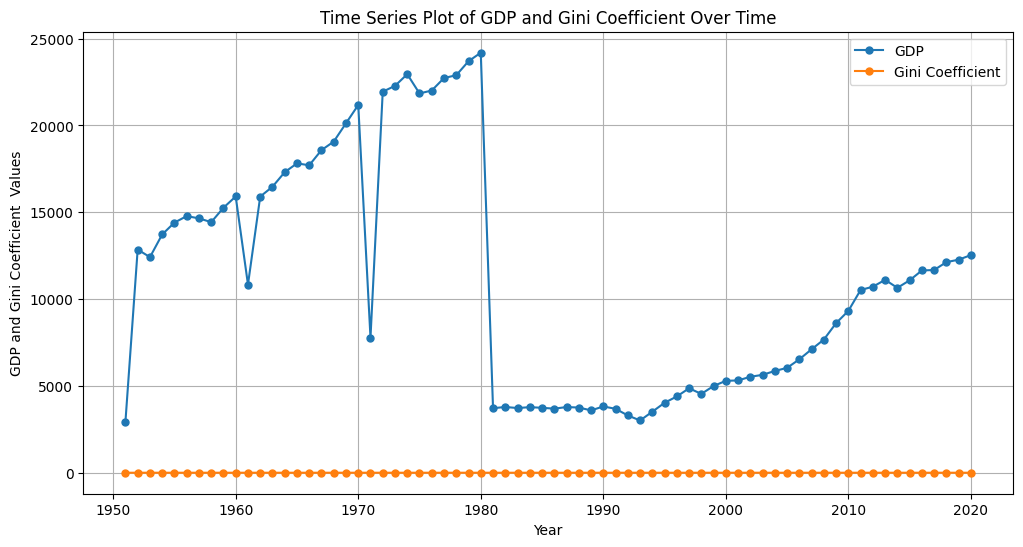

In [143]:
# Create a 'Time Series Plot of GDP and Gini Coefficient Over Time
plt.figure(figsize=(12, 6))
plt.plot(resampled_merged_df['Year'], resampled_merged_df['GDP'], label='GDP', linestyle='-', marker='o', markersize=5)

# Create a time series plot for Gini Coefficient
plt.plot(resampled_merged_df['Year'], resampled_merged_df['Gini Coefficient'], label='Gini Coefficient', linestyle='-', marker='o', markersize=5)

plt.title('Time Series Plot of GDP and Gini Coefficient Over Time')
plt.xlabel('Year')
plt.ylabel('GDP and Gini Coefficient  Values')
plt.legend()
plt.grid(True)
plt.show()

Step .5

In [162]:
# Calculate the correlation for each country
# Group the df by 'Country' and calculate .corr
corr_coeff = resampled_merged_df.groupby('Country')[['GDP', 'Gini Coefficient']]

#  the entire correlation coefficients DataFrame
corr_coeff.corr()

GDP  Gini Coefficient
Country                                               
Albania   GDP               1.000000          0.095131
          Gini Coefficient  0.095131          1.000000
Algeria   GDP               1.000000          1.000000
          Gini Coefficient  1.000000          1.000000
Argentina GDP                    NaN               NaN
          Gini Coefficient       NaN               NaN
Australia GDP               1.000000         -0.263686
          Gini Coefficient -0.263686          1.000000

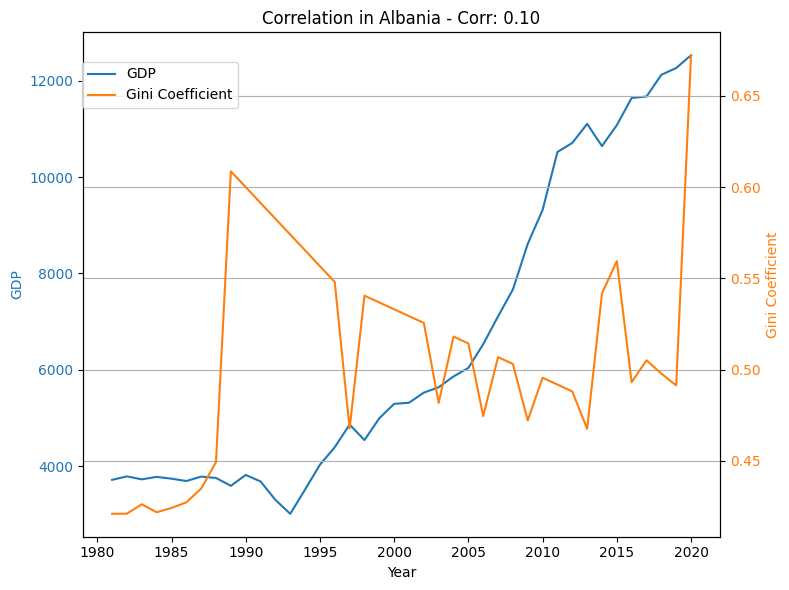

In [163]:
# Create a DataFrame
df = resampled_merged_df

# Loop through countries and plot correlation graphs
for country in df['Country'].unique():
    sub_df = df[df['Country'] == country]

# Create a figure
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot GDP on the primary y-axis (left)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='tab:blue')
ax1.plot(sub_df['Year'], sub_df['GDP'], color='tab:blue', label='GDP')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Gini Coefficient on the secondary y-axis (right)
ax2.set_ylabel('Gini Coefficient', color='tab:orange')
ax2.plot(sub_df['Year'], sub_df['Gini Coefficient'], color='tab:orange', label='Gini Coefficient')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Set titles and legends
plt.title(f'Correlation in {country} - Corr: {corr_value:.2f}')
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
plt.show()


In [160]:
# Get unique country names from the DataFrame
unique_countries = resampled_merged_df['Country'].unique()

# Calculate and display correlation coefficients for each country
for country in unique_countries:
    country_data = resampled_merged_df[resampled_merged_df['Country'] == country]

    # Calculate correlation coefficient between GDP and Gini Coefficient
    correlation_coefficient = country_data['GDP'].corr(country_data['Gini Coefficient'])

    print(f'Correlation between GDP and Gini Coefficient for {country}: {correlation_coefficient:.2f}')


Correlation between GDP and Gini Coefficient for Argentina: nan
Correlation between GDP and Gini Coefficient for Australia: -0.26
Correlation between GDP and Gini Coefficient for Algeria: 1.00
Correlation between GDP and Gini Coefficient for Albania: 0.10


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


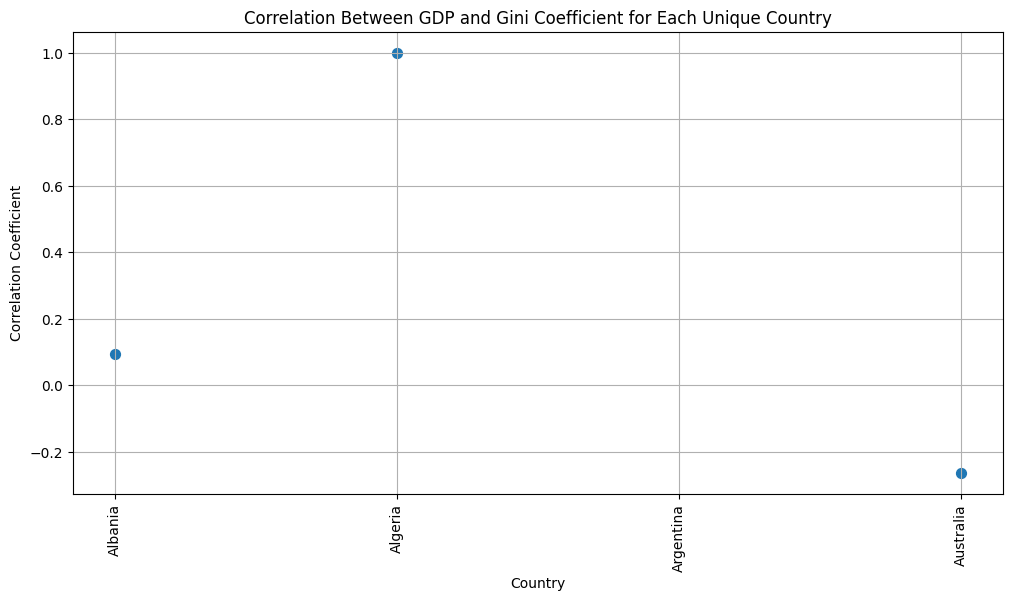

In [161]:
# Calculate the correlation for each unique country
correlation_values = resampled_merged_df.groupby('Country')[['GDP', 'Gini Coefficient']].corr().iloc[0::2, -1]

# Reset the index of the correlation coefficients Series
correlation_values = correlation_values.reset_index()

# Create a scatter plot to visualize the correlation coefficients
plt.figure(figsize=(12, 6))
plt.scatter(correlation_values['Country'], correlation_values['Gini Coefficient'], marker='o', s=50)
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Between GDP and Gini Coefficient for Each Unique Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#**Question: Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?**

 **Answer** :  Yes, there is a relationship between a country’s Gross Domestic Product (GDP) and its income inequality.

Result:
** Here's what the correlation values for each country result indicate:**
- If the correlation coefficient is close to 0 (around 0), it indicates a weak or no linear relationship between GDP and the Gini coefficient. In other words, changes in GDP do not significantly predict changes in income inequality or vice versa.
-If the correlation coefficient is close to 1 or -1, it indicates a strong linear relationship. A value of 1 suggests that GDP and the Gini coefficient move in the same direction (both increase or both decrease together), while a value of -1 suggests they move in opposite directions (as GDP increases, the Gini coefficient decreases, or vice versa).

According to above result, If there is a negative Correlation This means that as GDP per capita increases, income inequality decreases.

It's important to note that correlation does not imply causation. Other factors may also influence income inequality, and this correlation coefficient only captures the statistical relationship between these two variables.

However, further analysis and consideration of other socio-economic factors are often necessary to draw meaningful conclusions about causation and policy implications.